*Spring runs from March 1 to May 31

*Summer runs from June 1 to August 31

*Fall (autumn) runs from September 1 to November 30

*Winter runs from December 1 to February 28 (February 29 in a leap year).

In [1]:
%matplotlib inline

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import json
import copy
from typing import List
from urllib.request import urlretrieve
from urllib.parse import quote
import csv
import gmaps
import os
from config import g_key
# Access maps with unique API key
gmaps.configure(api_key=g_key)

# Import API key
from config import key
from config import email_key

Import saved csv. CSV includes data generated from 'StateCountySampleDataDF()' function.
Clean data.

In [26]:
# Import from .CSV
ca_la_df = pd.read_csv("./csv_data/california_data.csv") 

In [27]:
# Verify california is in dataframe
assert ca_la_df['state'][0] == 'California'

In [28]:
# Make copy before filtering
california_filtered_df = california_df.copy()

### Clean dataset.

In [29]:
# Based off the scatter plot, outliers can be found with a sample data over 400. Show all outliers over 400 sample measurement.
outlier = california_filtered_df[(california_filtered_df[['sample_measurement']] > 400).all(axis=1)]
# Select certain columns to use for mapping, 
california_filtered_df=california_filtered_df[['county','site_number','sample_measurement','latitude','longitude','time_local','date_gmt','time_gmt','date_of_last_change']]
# Drop nan values and empty values
california_filtered_df=california_filtered_df.dropna()
# Remove all numbers below 0 and above 400
california_filtered_df=california_filtered_df[(california_filtered_df[['sample_measurement']] > 0).all(axis=1) & (california_filtered_df[['sample_measurement']] < 400).all(axis=1)]
# Assign date_gmt DateTimeIndex. Allows for date searching throug index.
california_filtered_df['date_gmt']=pd.DatetimeIndex(california_filtered_df['date_gmt'])
#Set index to date_gmt
california_filtered_df = california_filtered_df.set_index('date_gmt')

### Clean Copy dataset.

In [30]:
# Copy of clean data
ca_la_clean_data = california_filtered_df.copy()

### Season: Spring

In [41]:
# Sort by date_gmt and time_gmt
spring_ca_la = ca_la_clean_data['2019-03-01':'2019-05-31'].sort_values(["date_gmt", "time_gmt"])
spring_ca_la

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change
date_gmt,,,,,,,,
2019-03-01,Los Angeles,1103,5.0,34.06659,-118.22688,16:00,00:00,2019-06-27
2019-03-01,Los Angeles,4004,2.2,33.79236,-118.17533,16:00,00:00,2019-06-24
2019-03-01,Los Angeles,6012,2.5,34.38344,-118.52840,16:00,00:00,2019-06-24
2019-03-01,Los Angeles,16,8.5,34.14435,-117.85036,16:00,00:00,2019-06-24
2019-03-01,Los Angeles,1201,6.2,34.19925,-118.53276,16:00,00:00,2019-06-24
...,...,...,...,...,...,...,...,...
2019-05-31,Los Angeles,1103,15.0,34.06659,-118.22688,15:00,23:00,2019-10-07
2019-05-31,Los Angeles,4004,8.2,33.79236,-118.17533,15:00,23:00,2019-10-07
2019-05-31,Los Angeles,6012,11.4,34.38344,-118.52840,15:00,23:00,2019-10-07


In [52]:
spring_ca_la['site_number'].unique()

array([1103, 4004, 6012,   16, 1201, 9034], dtype=int64)

In [53]:
site_number_1103=spring_ca_la[(spring_ca_la[['site_number']]==1103).all(axis=1)]

In [54]:
site_number_1103

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change
date_gmt,,,,,,,,
2019-03-01,Los Angeles,1103,5.0,34.06659,-118.22688,16:00,00:00,2019-06-27
2019-03-01,Los Angeles,1103,3.0,34.06659,-118.22688,17:00,01:00,2019-06-27
2019-03-01,Los Angeles,1103,1.0,34.06659,-118.22688,18:00,02:00,2019-06-27
2019-03-01,Los Angeles,1103,3.0,34.06659,-118.22688,19:00,03:00,2019-06-27
2019-03-01,Los Angeles,1103,6.0,34.06659,-118.22688,20:00,04:00,2019-06-27
...,...,...,...,...,...,...,...,...
2019-05-31,Los Angeles,1103,26.0,34.06659,-118.22688,11:00,19:00,2019-10-07
2019-05-31,Los Angeles,1103,24.0,34.06659,-118.22688,12:00,20:00,2019-10-07
2019-05-31,Los Angeles,1103,17.0,34.06659,-118.22688,13:00,21:00,2019-10-07


In [72]:
spring_sample_data = site_number_1103['sample_measurement']

In [78]:
site_number_1103.index.unique()

DatetimeIndex(['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
               '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16',
               '2019-03-17', '2019-03-18', '2019-03-19', '2019-03-20',
               '2019-03-21', '2019-03-22', '2019-03-23', '2019-03-24',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-03-30', '2019-03-31', '2019-04-01',
               '2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05',
               '2019-04-06', '2019-04-07', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-13',
               '2019-04-14', '2019-04-15', '2019-04-16', '2019-04-17',
               '2019-04-18', '2019-04-19', '2019-04-20', '2019-04-21',
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
      

TypeError: set_xlim() got an unexpected keyword argument 'rotation'

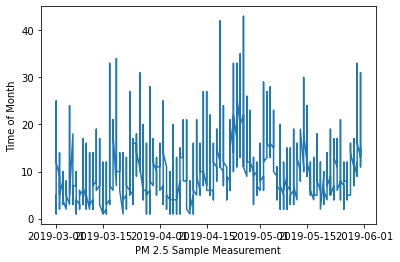

In [75]:
spring_plot = plt.plot(spring_sample_data)
#plt.xticks(int(day_time_frame))
plt.ylabel('Time of Month')
plt.xlabel('PM 2.5 Sample Measurement')

lab_ticks=['Label 1','Label 2','Label 3','Label 4']
x_ticks=[1,2,2.98,3]
plt.xlim(rotation=90)
plt.tight_layout()
plt.show()

### Season: Summer

In [42]:
# Sort by date_gmt and time_gmt
summer_ca_la = ca_la_clean_data['2019-06-01':'2019-08-31'].sort_values(["date_gmt", "time_gmt"])
summer_ca_la

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change
date_gmt,,,,,,,,
2019-06-01,Los Angeles,1103,17.0,34.06659,-118.22688,16:00,00:00,2019-10-07
2019-06-01,Los Angeles,4004,8.2,33.79236,-118.17533,16:00,00:00,2019-10-07
2019-06-01,Los Angeles,6012,14.8,34.38344,-118.52840,16:00,00:00,2019-10-07
2019-06-01,Los Angeles,16,17.4,34.14435,-117.85036,16:00,00:00,2019-10-02
2019-06-01,Los Angeles,1201,17.0,34.19925,-118.53276,16:00,00:00,2019-10-07
...,...,...,...,...,...,...,...,...
2019-08-31,Los Angeles,1103,40.0,34.06659,-118.22688,15:00,23:00,2020-02-11
2019-08-31,Los Angeles,4004,15.6,33.79236,-118.17533,15:00,23:00,2020-02-10
2019-08-31,Los Angeles,6012,3.2,34.38344,-118.52840,15:00,23:00,2020-02-10


### Season: Fall

In [43]:
# Sort by date_gmt and time_gmt
fall_ca_la = ca_la_clean_data['2019-09-01':'2019-11-30'].sort_values(["date_gmt", "time_gmt"])
fall_ca_la

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change
date_gmt,,,,,,,,
2019-09-01,Los Angeles,1103,15.0,34.06659,-118.22688,16:00,00:00,2020-02-11
2019-09-01,Los Angeles,4004,13.1,33.79236,-118.17533,16:00,00:00,2020-02-10
2019-09-01,Los Angeles,6012,1.8,34.38344,-118.52840,16:00,00:00,2020-02-10
2019-09-01,Los Angeles,16,15.4,34.14435,-117.85036,16:00,00:00,2020-02-06
2019-09-01,Los Angeles,1201,10.4,34.19925,-118.53276,16:00,00:00,2020-02-10
...,...,...,...,...,...,...,...,...
2019-11-30,Los Angeles,1103,5.0,34.06659,-118.22688,15:00,23:00,2020-03-31
2019-11-30,Los Angeles,4004,2.9,33.79236,-118.17533,15:00,23:00,2020-03-31
2019-11-30,Los Angeles,6012,5.4,34.38344,-118.52840,15:00,23:00,2020-03-25


### Season: Winter

In [47]:
# Beginning of the year Winter
# Sort by date_gmt and time_gmt
winter_begin_ca_la = ca_la_clean_data['2019-01-01':'2019-02'].sort_values(["date_gmt", "time_gmt"])
winter_begin_ca_la

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change
date_gmt,,,,,,,,
2019-01-01,Los Angeles,1103,45.0,34.06659,-118.22688,00:00,08:00,2019-06-27
2019-01-01,Los Angeles,4004,9.4,33.79236,-118.17533,00:00,08:00,2019-06-24
2019-01-01,Los Angeles,16,6.2,34.14435,-117.85036,00:00,08:00,2019-06-24
2019-01-01,Los Angeles,1201,5.8,34.19925,-118.53276,00:00,08:00,2019-06-24
2019-01-01,Los Angeles,1103,30.0,34.06659,-118.22688,01:00,09:00,2019-06-27
...,...,...,...,...,...,...,...,...
2019-02-28,Los Angeles,1103,8.0,34.06659,-118.22688,15:00,23:00,2019-06-27
2019-02-28,Los Angeles,4004,3.1,33.79236,-118.17533,15:00,23:00,2019-06-24
2019-02-28,Los Angeles,6012,3.0,34.38344,-118.52840,15:00,23:00,2019-06-24


In [48]:
# End of the year Winter
# Sort by date_gmt and time_gmt
winter_end_ca_la = ca_la_clean_data['2019-12-01':'2019-12'].sort_values(["date_gmt", "time_gmt"])
winter_end_ca_la

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change
date_gmt,,,,,,,,
2019-12-01,Los Angeles,1103,4.0,34.06659,-118.22688,16:00,00:00,2020-03-31
2019-12-01,Los Angeles,4004,1.9,33.79236,-118.17533,16:00,00:00,2020-03-31
2019-12-01,Los Angeles,6012,5.7,34.38344,-118.52840,16:00,00:00,2020-03-25
2019-12-01,Los Angeles,16,6.1,34.14435,-117.85036,16:00,00:00,2020-03-24
2019-12-01,Los Angeles,1201,13.0,34.19925,-118.53276,16:00,00:00,2020-03-25
...,...,...,...,...,...,...,...,...
2019-12-02,Los Angeles,1103,12.0,34.06659,-118.22688,23:00,07:00,2020-03-31
2019-12-02,Los Angeles,4004,24.9,33.79236,-118.17533,23:00,07:00,2020-03-31
2019-12-02,Los Angeles,6012,12.8,34.38344,-118.52840,23:00,07:00,2020-03-25
